In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('E:/Data Scientist/video Learning Situation on New Delhi in Covid-19 Era _ Kaggle_files/COVID-19 Survey Student Responses.csv')
df.head()


,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [2]:
import numpy as np

# PREPROCESSING DATA
# Membuat list tingkat jenjang pendidikan berdasarkan umur
Conditions = [
    (df['Age of Subject'] <= 12),
    (df['Age of Subject'] >=13) & (df['Age of Subject'] <= 15),
    (df['Age of Subject'] >=16) & (df['Age of Subject'] <= 18),
    (df['Age of Subject'] >= 19)]

# Membuat list tingkat pendidikan
Values = ['ES', 'JHS', 'SHS', 'College']

# KOLOM BARU 1 Menggabungkan list tingkat jenjang dan list tingkat pendidikan jadi level pendidikan
df["Subject's level of school"] = np.select(Conditions, Values)

# Membuat rating dari pengalaman online class menjadi 1-5
Conditions = [
    df['Rating of Online Class experience'] == 'Very poor',
    df['Rating of Online Class experience'] == 'Poor',
    df['Rating of Online Class experience'] == 'Average',
    df['Rating of Online Class experience'] == 'Good',
    df['Rating of Online Class experience'] == 'Excellent']

Values = [1, 2, 3, 4, 5]

# MENGGANTI KOLOM BARU 2 rating pengalaman online class very poor-excellent jadi 1-5
df['Rating of Online Class experience'] = np.select(Conditions, Values)

# KOLOM BARU 3 Membuat kolom baru apakah pelajar lebih bersosial media drpd belajar mandiri
Conditions = [
    df['Time spent on social media'] > df['Time spent on self study']
]

Values = ['YES']

df['Is student spent more time on Sosial Media than Self Study?'] = np.select(Conditions, Values, default='NO')

# KOLOM BARU 4 (apakah pelajar tidur secara cukup?)
Conditions = [
    (df["Subject's level of school"] == 'ES') & ((df['Time spent on sleep'] >= 9) & (df['Time spent on sleep'] <=10)),
    (df["Subject's level of school"] == 'JHS') & ((df['Time spent on sleep'] >= 8) & (df['Time spent on sleep'] <=10)),
    (df["Subject's level of school"] == 'SHS') & ((df['Time spent on sleep'] >= 8) & (df['Time spent on sleep'] <=10)),
    (df["Subject's level of school"] == 'College') & ((df['Time spent on sleep'] >= 7) & (df['Time spent on sleep'] <=10))
]

Values = ['YES', 'YES', 'YES', 'YES']

df['Is student has normal time sleep?'] = np.select(Conditions, Values, default = 'NO')

# KOLOM BARU 5 (Total waktu belajar pelajar)
df['Total time study'] = df['Time spent on Online Class'] + df['Time spent on self study']

# KOLOM BARU 6 (apakah pelajar berolahraga cukup?)
Conditions = [
    (df["Subject's level of school"] == 'ES') & ((df['Time spent on fitness'] >= 0.5)),
    (df["Subject's level of school"] == 'JHS') & ((df['Time spent on fitness'] >= 1)),
    (df["Subject's level of school"] == 'SHS') & ((df['Time spent on fitness'] >= 1.5)),
    (df["Subject's level of school"] == 'College') & ((df['Time spent on fitness'] >= 2))
]

Values = ['YES', 'YES', 'YES', 'YES']

df['Is student has normal time fitness?'] = np.select(Conditions, Values, default = 'NO')

df

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,...,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Subject's level of school,Is student spent more time on Sosial Media than Self Study?,Is student has normal time sleep?,Total time study,Is student has normal time fitness?
0,R1,Delhi-NCR,21,2.0,4,Laptop/Desktop,4.0,0.0,7.0,3.0,...,NO,Cooking,YES,YES,School/college,College,NO,YES,6.0,NO
1,R2,Delhi-NCR,21,0.0,5,Smartphone,0.0,2.0,10.0,3.0,...,NO,Scrolling through social media,YES,NO,Roaming around freely,College,YES,YES,0.0,YES
2,R3,Delhi-NCR,20,7.0,1,Laptop/Desktop,3.0,0.0,6.0,2.0,...,NO,Listening to music,NO,YES,Travelling,College,NO,NO,10.0,NO
3,R4,Delhi-NCR,20,3.0,1,Smartphone,2.0,1.0,6.0,5.0,...,NO,Watching web series,NO,NO,"Friends , relatives",College,YES,NO,5.0,NO
4,R5,Delhi-NCR,21,3.0,4,Laptop/Desktop,3.0,1.0,8.0,3.0,...,NO,Social Media,NO,NO,Travelling,College,NO,YES,6.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,4,Smartphone,4.0,1.0,8.0,1.0,...,NO,Dancing,YES,YES,Travelling,ES,NO,NO,7.0,YES
1178,R1192,Delhi-NCR,14,6.0,3,Smartphone,4.0,1.0,9.0,1.0,...,NO,Listening to music,YES,YES,"Friends , relatives",JHS,NO,YES,10.0,YES
1179,R1193,Delhi-NCR,13,4.0,3,Smartphone,0.0,0.5,8.0,3.0,...,NO,Online gaming,NO,YES,School/college,JHS,YES,YES,4.0,NO
1180,R1194,Delhi-NCR,14,5.0,5,Laptop/Desktop,3.5,1.0,8.0,0.5,...,NO,Reading books,YES,YES,School/college,JHS,NO,YES,8.5,YES


In [3]:
# Basic Statistical Anlysis
df.describe()

,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Number of meals per day,Total time study
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,20.165821,3.208841,2.575296,2.911591,0.765821,7.871235,2.365694,2.917936,6.120431
std,5.516467,2.101756,1.397590,2.140590,0.724451,1.615762,1.767336,0.828698,3.173819
min,7.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000
25%,17.000000,2.000000,1.000000,2.000000,0.000000,7.000000,1.000000,2.000000,4.000000
50%,20.000000,3.000000,3.000000,2.000000,1.000000,8.000000,2.000000,3.000000,6.000000
75%,21.000000,5.000000,4.000000,4.000000,1.000000,9.000000,3.000000,3.000000,8.000000
max,59.000000,10.000000,5.000000,18.000000,5.000000,15.000000,10.000000,8.000000,22.000000


In [4]:
# Mendeklarasikan variabel berdasarkan tingkat pendidikan
df_ElementarySchool = df[df["Subject's level of school"] == 'ES']
df_JuniorHighSchool = df[df["Subject's level of school"] == 'JHS']
df_SeniorHighSchool = df[df["Subject's level of school"] == 'SHS']
df_College = df[df["Subject's level of school"] == 'College']

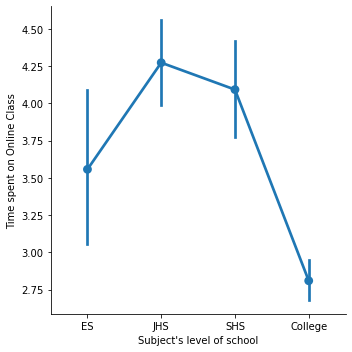

In [5]:
# VISUALISASI DAN ANALISIS

import seaborn as sns
# Time spent on online class

# Membuat grafik yang menunjukkan persebaran data lama waktu online class berdasarkan tingkat pendidikan
sns.catplot(x="Subject's level of school", y="Time spent on Online Class", kind='point', order=['ES', 'JHS', 'SHS', 'College'], data=df)

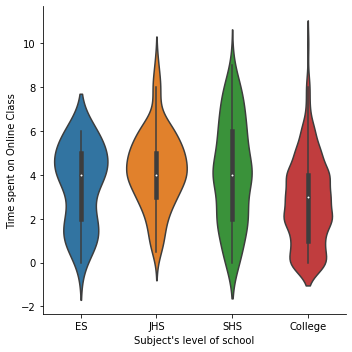

In [6]:
# Membuat grafik gelembung yang fungsinya sama untuk mengetahui jumlah waktu belajar online class
sns.catplot(x="Subject's level of school", y="Time spent on Online Class", kind='violin', order=['ES', 'JHS', 'SHS', 'College'], data=df)

In [7]:
# RATING ON ONLINE CLASS

df['Rating of Online Class experience'].value_counts()

1    413
3    387
4    230
5     98
2     30
0     24
Name: Rating of Online Class experience, dtype: int64

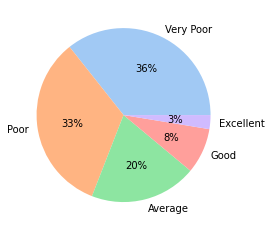

In [8]:
#define data
data = [413, 387, 230, 98, 30]
labels = ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent']

#define seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

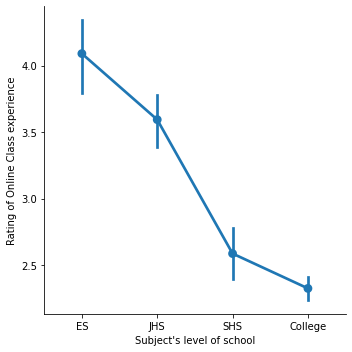

In [9]:
# Membuat grafik yang menunjukkan persebaran data RATING ONLINE online class berdasarkan tingkat pendidikan
sns.catplot(x="Subject's level of school", y="Rating of Online Class experience", kind='point', order=['ES', 'JHS', 'SHS', 'College'], data=df)

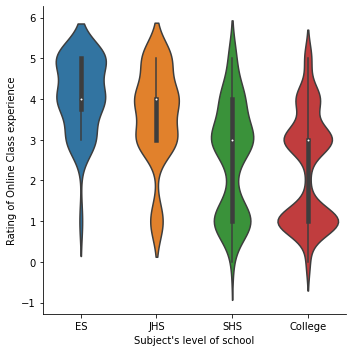

In [10]:
# Membuat grafik gelembung yang fungsinya sama untuk mengetahui RATING online class berdasarkan jenjang pendidikan
sns.catplot(x="Subject's level of school", y="Rating of Online Class experience", kind='violin', order=['ES', 'JHS', 'SHS', 'College'], data=df)

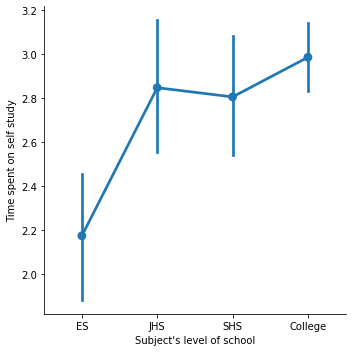

In [11]:
# Membuat grafik yang fungsinya untuk mengetahui waktu belajar mandiri pada online class berdasarkan jenjang pendidikan
sns.catplot(x="Subject's level of school", y="Time spent on self study", kind='point', order=['ES', 'JHS', 'SHS', 'College'], data=df)

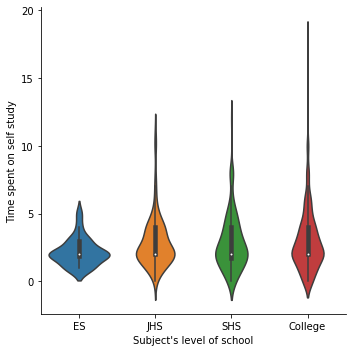

In [12]:
# Membuat grafik violin/biola yang fungsinya untuk mengetahui waktu belajar mandiri pada online class berdasarkan jenjang pendidikan
sns.catplot(x="Subject's level of school", y="Time spent on self study", kind='violin', order=['ES', 'JHS', 'SHS', 'College'], data=df)

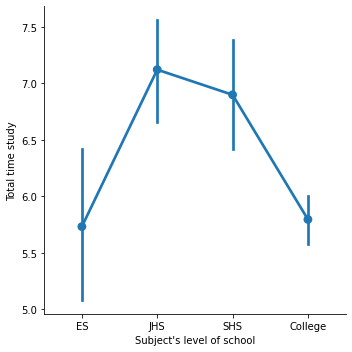

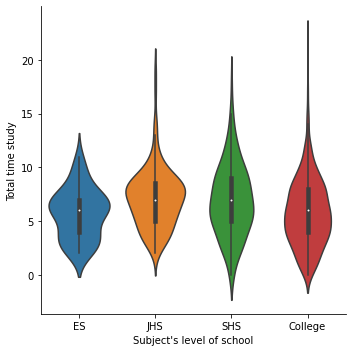

In [13]:
# Total waktu belajar (waktu kelas online + waktu belajar mandiri)
sns.catplot(x="Subject's level of school", y="Total time study", kind='point', order=['ES', 'JHS', 'SHS', 'College'], data=df )
sns.catplot(x="Subject's level of school", y="Total time study", kind='violin', order=['ES', 'JHS', 'SHS', 'College'], data=df )


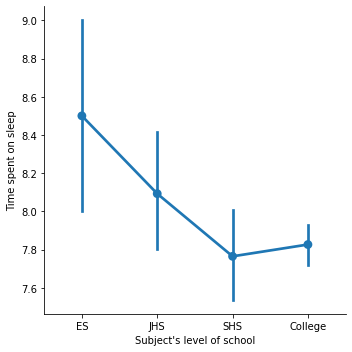

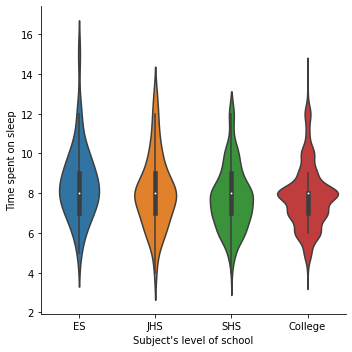

In [14]:
# ANALISIS TOTAL WAKTU TIDUR 
sns.catplot(x="Subject's level of school", y="Time spent on sleep", kind='point', order=['ES', 'JHS', 'SHS', 'College'], data=df )
sns.catplot(x="Subject's level of school", y="Time spent on sleep", kind='violin', order=['ES', 'JHS', 'SHS', 'College'], data=df )

In [15]:
# IS STUDENT HAS NORMAL TIME AMOUNT OF SLEEP?

from locale import normalize
df_ElementarySchool["Is student has normal time sleep?"].value_counts(normalize=True)

NO     0.659091
YES    0.340909
Name: Is student has normal time sleep?, dtype: float64

In [16]:
df_JuniorHighSchool["Is student has normal time sleep?"].value_counts(normalize=True)

YES    0.526316
NO     0.473684
Name: Is student has normal time sleep?, dtype: float64

In [17]:
df_SeniorHighSchool["Is student has normal time sleep?"].value_counts(normalize=True)

NO     0.518325
YES    0.481675
Name: Is student has normal time sleep?, dtype: float64

In [18]:
df_College["Is student has normal time sleep?"].value_counts(normalize=True)

YES    0.750614
NO     0.249386
Name: Is student has normal time sleep?, dtype: float64

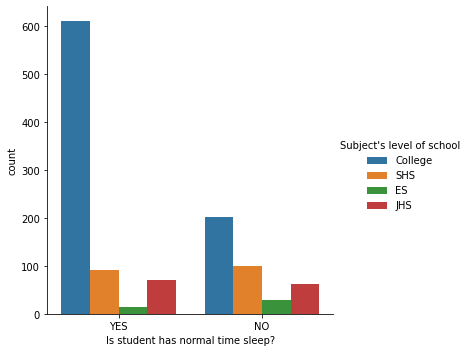

In [19]:
# BAR CHART APAKAH MURID ITU DAPAT JAM TIDUR NORMAL?
sns.catplot(x="Is student has normal time sleep?", hue="Subject's level of school", kind='count', data=df )

In [20]:
# IS STUDENT SPENT MORE TIME ON SOCIAL MEDIA THAN SELF STUDY?

df_ElementarySchool["Is student spent more time on Sosial Media than Self Study?"].value_counts(normalize=True)

NO     0.795455
YES    0.204545
Name: Is student spent more time on Sosial Media than Self Study?, dtype: float64

In [21]:
df_JuniorHighSchool["Is student spent more time on Sosial Media than Self Study?"].value_counts(normalize=True)

NO     0.857143
YES    0.142857
Name: Is student spent more time on Sosial Media than Self Study?, dtype: float64

In [22]:
df_SeniorHighSchool["Is student spent more time on Sosial Media than Self Study?"].value_counts(normalize=True)

NO     0.701571
YES    0.298429
Name: Is student spent more time on Sosial Media than Self Study?, dtype: float64

In [23]:
df_College["Is student spent more time on Sosial Media than Self Study?"].value_counts(normalize=True)

NO     0.638821
YES    0.361179
Name: Is student spent more time on Sosial Media than Self Study?, dtype: float64

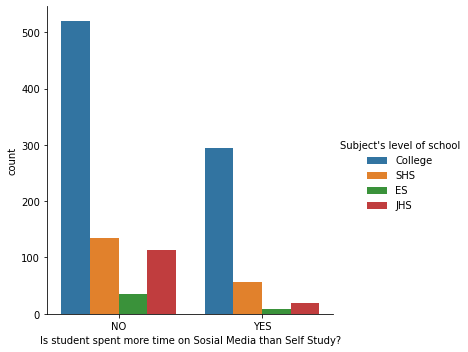

In [24]:
# BAR CHART
sns.catplot(x="Is student spent more time on Sosial Media than Self Study?", hue="Subject's level of school", kind='count', data=df )

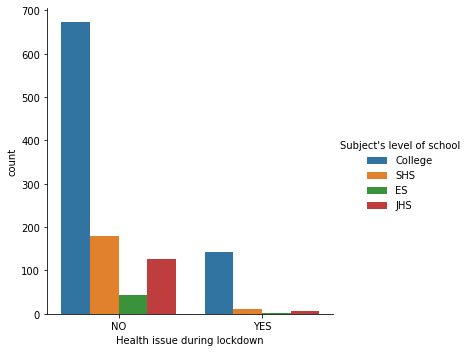

In [25]:
# HEALTH ISSUES DURING LOCKDOWN
sns.catplot(x="Health issue during lockdown", hue="Subject's level of school", kind='count', data=df )

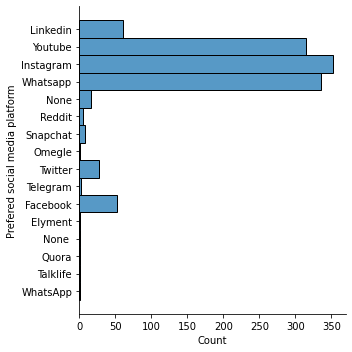

In [26]:
# MEDIA SOSIAL TERBANYAK DIGUNAKAN OLEH PELAJAR INDIA SAAT COVID-19

sns.displot(df, y="Prefered social media platform")

In [27]:
# Gadget populer di pelajar india

df["Medium for online class"].value_counts()

Laptop/Desktop                  545
Smartphone                      539
Tablet                           37
Any Gadget                        5
Smartphone or Laptop/Desktop      5
Name: Medium for online class, dtype: int64

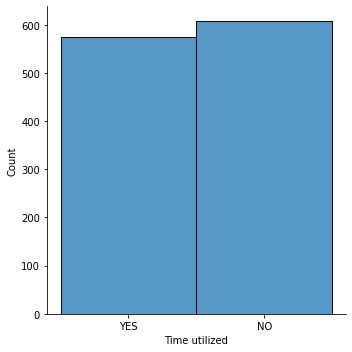

In [28]:
# Apakah pelajar merasa memanfaatkan waktunya?

sns.displot(x="Time utilized", data=df)

In [29]:
# KOLOM BARU 6 (apakah pelajar berolahraga secara cukup?)
Conditions = [
    (df["Subject's level of school"] == 'ES') & ((df['Time spent on fitness'] >= 0.5)),
    (df["Subject's level of school"] == 'JHS') & ((df['Time spent on fitness'] >= 1)),
    (df["Subject's level of school"] == 'SHS') & ((df['Time spent on fitness'] >= 1.5)),
    (df["Subject's level of school"] == 'College') & ((df['Time spent on fitness'] >= 2))
]

Values = ['YES', 'YES', 'YES', 'YES']

df['Is student has normal time fitness?'] = np.select(Conditions, Values, default = 'NO')

In [30]:
# SD OLAHRAGA CUKUP?
df_ElementarySchool["Is student has normal time fitness?"].value_counts(normalize=True)

YES    0.75
NO     0.25
Name: Is student has normal time fitness?, dtype: float64

In [31]:
# SMP OLAHRAGA CUKUP?
df_JuniorHighSchool["Is student has normal time fitness?"].value_counts(normalize=True)

YES    0.631579
NO     0.368421
Name: Is student has normal time fitness?, dtype: float64

In [32]:
# SMA OLAHRAGA CUKUP?
df_SeniorHighSchool["Is student has normal time fitness?"].value_counts(normalize=True)

NO     0.842932
YES    0.157068
Name: Is student has normal time fitness?, dtype: float64

In [33]:
# KULIAH OLAHRAGA CUKUP?
df_College["Is student has normal time fitness?"].value_counts(normalize=True)

NO     0.884521
YES    0.115479
Name: Is student has normal time fitness?, dtype: float64

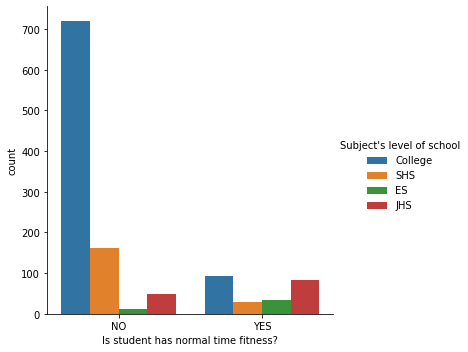

In [34]:
# BAR CHART OLAHRAGA CUKUP

sns.catplot(x="Is student has normal time fitness?", hue="Subject's level of school", kind="count", data=df )

In [35]:
df

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,...,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Subject's level of school,Is student spent more time on Sosial Media than Self Study?,Is student has normal time sleep?,Total time study,Is student has normal time fitness?
0,R1,Delhi-NCR,21,2.0,4,Laptop/Desktop,4.0,0.0,7.0,3.0,...,NO,Cooking,YES,YES,School/college,College,NO,YES,6.0,NO
1,R2,Delhi-NCR,21,0.0,5,Smartphone,0.0,2.0,10.0,3.0,...,NO,Scrolling through social media,YES,NO,Roaming around freely,College,YES,YES,0.0,YES
2,R3,Delhi-NCR,20,7.0,1,Laptop/Desktop,3.0,0.0,6.0,2.0,...,NO,Listening to music,NO,YES,Travelling,College,NO,NO,10.0,NO
3,R4,Delhi-NCR,20,3.0,1,Smartphone,2.0,1.0,6.0,5.0,...,NO,Watching web series,NO,NO,"Friends , relatives",College,YES,NO,5.0,NO
4,R5,Delhi-NCR,21,3.0,4,Laptop/Desktop,3.0,1.0,8.0,3.0,...,NO,Social Media,NO,NO,Travelling,College,NO,YES,6.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,4,Smartphone,4.0,1.0,8.0,1.0,...,NO,Dancing,YES,YES,Travelling,ES,NO,NO,7.0,YES
1178,R1192,Delhi-NCR,14,6.0,3,Smartphone,4.0,1.0,9.0,1.0,...,NO,Listening to music,YES,YES,"Friends , relatives",JHS,NO,YES,10.0,YES
1179,R1193,Delhi-NCR,13,4.0,3,Smartphone,0.0,0.5,8.0,3.0,...,NO,Online gaming,NO,YES,School/college,JHS,YES,YES,4.0,NO
1180,R1194,Delhi-NCR,14,5.0,5,Laptop/Desktop,3.5,1.0,8.0,0.5,...,NO,Reading books,YES,YES,School/college,JHS,NO,YES,8.5,YES
